# Gathering Data

In [1]:
# all the libraries, modules, etc. used in this project

import pandas as pd
import requests
import tweepy
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns


In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# downloading image_predictions.tsv


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)


335079

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')


In [5]:
# getting data from the Twitter API

consumer_key = <redacted>
consumer_secret =  <redacted>
access_token =  <redacted>
access_secret = <redacted>

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


SyntaxError: invalid syntax (<ipython-input-5-e848d3bd3d15>, line 3)

In [11]:
dogtweet = {}
dogtweet['tweet'] = []

for id_no in twitter_archive_enhanced['tweet_id']:
    
    try:
        tweet = api.get_status(id_no, tweet_mode='extended')

        dogtweet['tweet'].append({
            'tweet_id':tweet.id,
            'retweets':tweet.retweet_count,
            'favorites':tweet.favorite_count
        })

        with open('tweet_json.txt', 'w') as outfile:
            json.dump(dogtweet, outfile)
            
    except:
        print('No status found with that ID.')
        

Rate limit reached. Sleeping for: 173
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
No status found with that ID.
Rate limit reached. Sleeping for: 699
Rate limit reached. Sleeping for: 685


In [5]:
#The following is copied from this stackexchange question: 
#https://datascience.stackexchange.com/questions/23674/converting-json-file-to-dataframe-python

import json
import csv
import sys

data_parsed = json.loads(open('tweet_json.txt').read())
log_data = data_parsed['tweet']

# open a CSV file for writing
tweet_json = open('tweet_json.csv', 'w')

# create the csv writer object
csvwriter = csv.writer(tweet_json)
count = 0

for i in log_data:
      if count == 0:
             header = i.keys()
             csvwriter.writerow(header)
             count += 1
      csvwriter.writerow(i.values())

tweet_json.close()

In [6]:
tweet_json = pd.read_csv('tweet_json.csv')

# Assess Data 

In [7]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Buddy           7
Daisy           7
Toby            7
Bailey          7
an              7
Rusty           6
Oscar           6
Stanley         6
Jack            6
Jax             6
Dave            6
Scout           6
Koda            6
Leo             6
Bella           6
Milo            6
Oakley          5
             ... 
Bobby           1
by              1
Kane            1
officially      1
Keet            1
Blu             1
Al              1
Harry           1
Buckley         1
Kevon           1
Ruffles         1
Brockly         1
Christoper      1
General         1
Spark           1
Monster         1
Dot             1
Teddy           1
Julius          1
Ralphé          1
Molly           1
Newt            1
Poppy           1
Mark            1
Jarvis    

In [11]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [219]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweet_json

,tweet_id,retweets,favorites
0,892420643555336193,8697,39117
1,892177421306343426,6386,33502
2,891815181378084864,4241,25250
3,891689557279858688,8798,42480
4,891327558926688256,9577,40637
5,891087950875897856,3178,20384
6,890971913173991426,2116,11950
7,890729181411237888,19276,66089
8,890609185150312448,4338,27988
9,890240255349198849,7566,32204


In [220]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 3 columns):
tweet_id     2346 non-null int64
retweets     2346 non-null int64
favorites    2346 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


### Quality Issues:

- Retweets of other users in twitter_archive_enhanced
- Some tweets don't have images
- Source column has HTML tags
- tweet_id and timestamps are not the correct datatype
- some of the numerators are clearly wrong
- dog 'stages' are stored as None instead of NaN
- Some dog names are incorrect
- image_predictions column names aren't very clear


### Tidiness Issues
- Separate out dog stages should be melted into a single column with the necessary title
- Create a master dataset with data for each tweet that is original and has a picture of a dog

# Clean

In [12]:
#create clean copies of all datasets
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

##### Define

Strip out any tweets that are just retweets of other users, and remove the (now unneccessary) retweeted_ columns

##### Code

In [13]:
#only retweets have any non-null data in the retweeted_* columns

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('retweeted_status_id', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('retweeted_status_user_id', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('retweeted_status_timestamp', axis=1)

##### Test

In [14]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


##### Define

Remove all tweets without images from twitter_archive_enhanced_clean

#### Code

In [15]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'].isin(image_predictions_clean['tweet_id'])]


#### Test

In [16]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


#### Define

- Strip HTML from source in twitter_archive_enhanced_clean


#### Code

In [17]:
twitter_archive_enhanced_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].str.replace('<[^<]+?>', '')

#### Test

In [19]:
twitter_archive_enhanced_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Define

Tweet_id and in_reply_to's should be strings, not integers
Dates should be datetime

In [21]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


#### Code

In [24]:
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
twitter_archive_enhanced_clean['in_reply_to_status_id'] = twitter_archive_enhanced_clean['in_reply_to_status_id'].astype(str)
twitter_archive_enhanced_clean['in_reply_to_user_id'] = twitter_archive_enhanced_clean['in_reply_to_user_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
image_predictions_clean['img_num'] = image_predictions_clean['img_num'].astype(str)
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(str)
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'], infer_datetime_format=True)


#### Test

In [25]:
print(twitter_archive_enhanced_clean.info())
print(image_predictions_clean.info())
print(tweet_json_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 233.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null 

#### Define

Change dog stage (pupper, etc.) from None to Na/NaN

#### Code

In [26]:
twitter_archive_enhanced_clean['doggo'] = twitter_archive_enhanced_clean['doggo'].replace('None',np.NaN)
twitter_archive_enhanced_clean['floofer'] = twitter_archive_enhanced_clean['floofer'].replace('None',np.NaN)
twitter_archive_enhanced_clean['pupper'] = twitter_archive_enhanced_clean['pupper'].replace('None',np.NaN)
twitter_archive_enhanced_clean['puppo'] = twitter_archive_enhanced_clean['puppo'].replace('None',np.NaN)

#### Test

In [27]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    74 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 233.7+ KB


#### Define

Get correct rating_numerator numbers by writing a fresh regex to account for decimals

#### Code

In [81]:
# Note: The dog with the 24/7 error rating appears to be the only dog to not have an official rating, 
#possibly in dog_rates' history!
# Comments on the tweet indicate an audience opinion that 11/10 is a fair rating, but I've decided to let 24/7 stand.
# All other errors seem to be around incorrect picking up of decimals 

# 666287406224695296 picked up the wrong fraction, so I will change that manually
#twitter_archive_enhanced_clean['rating_numerator'] = 


twitter_archive_enhanced_clean['rating_numerator'] = twitter_archive_enhanced_clean.text.str.extract('\s(\d\d?\d?\.?\d?\d?\d?)/')




/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  # Remove the CWD from sys.path while we load stuff.


In [130]:
# this should probably use pd.at or literally anything more elegant, but there's little documentation for that and expediency won

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == '666287406224695296', 'rating_numerator'] = '9'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == '666287406224695296', 'rating_denominator'] = '10'



In [133]:
twitter_archive_enhanced_clean['rating_numerator'] = twitter_archive_enhanced_clean['rating_numerator'].astype('float64')


#### Test

In [134]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == '666287406224695296']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,nan,nan,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,an,NaN,NaN,NaN,NaN


In [135]:
twitter_archive_enhanced_clean.rating_numerator.value_counts()

12.00      444
10.00      408
11.00      392
13.00      261
9.00       149
8.00        93
7.00        53
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         8
1.00         4
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

In [136]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1968 non-null float64
rating_denominator       1994 non-null object
name                     1994 non-null object
doggo                    74 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 313.7+ KB


In [137]:
print(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_numerator < 10])

                tweet_id in_reply_to_status_id in_reply_to_user_id  \
229   848212111729840128                   nan                 nan   
315   835152434251116546                   nan                 nan   
695   786709082849828864                   nan                 nan   
730   781661882474196992                   nan                 nan   
765   777885040357281792                   nan                 nan   
814   771014301343748096                   nan                 nan   
835   768193404517830656                   nan                 nan   
845   766423258543644672                   nan                 nan   
859   763183847194451968                   nan                 nan   
883   760252756032651264                   nan                 nan   
896   759099523532779520                   nan                 nan   
906   758041019896193024                   nan                 nan   
912   757596066325864448                   nan                 nan   
915   75735476039994

#### Define

Obviously incorrect names should be changed to NaN

#### Code

In [138]:
# all of the non-names start with a lowercase letter

twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace(to_replace='^[a-z]*$', value=np.NaN, regex=True)


In [139]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace('None',np.NaN)


### Test

In [140]:
twitter_archive_enhanced_clean.name.value_counts()

Charlie       11
Cooper        10
Oliver        10
Lucy          10
Tucker         9
Penny          9
Winston        8
Sadie          8
Toby           7
Daisy          7
Lola           7
Bella          6
Koda           6
Bo             6
Jax            6
Stanley        6
Buddy          5
Louis          5
Bailey         5
Scout          5
Oscar          5
Leo            5
Milo           5
Chester        5
Dave           5
Rusty          5
Maggie         4
Duke           4
Archie         4
Dexter         4
              ..
Bruiser        1
Bowie          1
Brian          1
Mookie         1
Snoop          1
Jarvis         1
Mark           1
Poppy          1
Brockly        1
Scruffers      1
Sobe           1
Taco           1
Sailor         1
Toffee         1
Harry          1
Kevon          1
Wafer          1
Ruffles        1
Cali           1
Newt           1
Christoper     1
General        1
Spark          1
Monster        1
Levi           1
Naphaniel      1
Buckley        1
Julius        

#### Define

Change most of the image_predictions column names to be clearer:

jpg_url : picture_url

img_num : best_image

p1 : prediction_1

p1_conf : confidence_1

p1_dog : breed_1

p2 : prediction_2

p2_conf : confidence_2

p2_dog : breed_2

p3 : prediction_3

p3_conf : confidence_3

p3_dog : breed_3


#### Code

In [141]:
image_predictions_clean = image_predictions_clean.rename(columns={'jpg_url': 'picture_url', 'img_num': 'best_image', 'p1':'prediction_1', 
                                        'p1_conf' : 'confidence_1', 'p1_dog' : 'breed_1', 'p2':'prediction_2', 
                                        'p2_conf':'confidence_2','p2_dog':'breed_2','p3':'prediction_3', 
                                        'p3_conf':'confidence_3', 'p3_dog':'breed_3'
                                       })

#### Test

In [142]:
image_predictions_clean.head(1)

,tweet_id,picture_url,best_image,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Describe

Melt the dog stages section

#### Code

In [143]:
# create a new df to make it a little less unwieldy to work with
dog_stages = twitter_archive_enhanced_clean[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']].copy()

In [144]:
# Melt df
dog_stages = pd.melt(dog_stages, id_vars=['tweet_id'])

In [145]:
dog_stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 3 columns):
tweet_id    7976 non-null object
variable    7976 non-null object
value       317 non-null object
dtypes: object(3)
memory usage: 187.0+ KB


In [146]:
# select the two useful columns
dog_stages = dog_stages[['tweet_id', 'value']]


In [147]:
dog_stages = dog_stages.dropna()

In [148]:
# Originally, I rejoined dog_stages to twitter_archive_enhanced, but saw that there was a small increase in number of rows.
#Not wanting to duplicate tweets, I checked for dupes in dog_stages, and found them, and then went from there.

dog_stages.loc[dog_stages.duplicated(subset='tweet_id')]

,tweet_id,value
2148,854010172552949760,floofer
4328,817777686764523521,pupper
4385,808106460588765185,pupper
4407,802265048156610565,pupper
4413,801115127852503040,pupper
4498,785639753186217984,pupper
4640,759793422261743616,pupper
4692,751583847268179968,pupper
4783,741067306818797568,pupper
4829,733109485275860992,pupper


In [149]:
stage_dupe = ['854010172552949760' ,'817777686764523521', '808106460588765185', '802265048156610565', '801115127852503040'
             , '785639753186217984', '759793422261743616', '751583847268179968', '741067306818797568', '733109485275860992'
             '855851453814013952']

I went through each dupe and tried to get context clues to determine actual dog stage. If there wasn't a clear identification in the text, or it wasn't evident from the photo, I followed these rules:

Puppers who want to be doggos or are posing with their doggo parents are assigned doggo
If two dogs are featured, doggo is chosen as the more generic term.

'854010172552949760' floofer

'817777686764523521' pupper

'808106460588765185' doggo 

'802265048156610565' doggo 

'801115127852503040' pupper 

'785639753186217984' doggo

'759793422261743616' doggo 

'751583847268179968' doggo 

'741067306818797568' doggo 

'733109485275860992' doggo 

'855851453814013952' puppo 



In [150]:
dog_stages.loc[dog_stages['tweet_id'].isin(stage_dupe)]

,tweet_id,value
154,854010172552949760,doggo
340,817777686764523521,doggo
397,808106460588765185,doggo
419,802265048156610565,doggo
425,801115127852503040,doggo
510,785639753186217984,doggo
652,759793422261743616,doggo
704,751583847268179968,doggo
795,741067306818797568,doggo
2148,854010172552949760,floofer


In [151]:
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '854010172552949760') & (dog_stages.value!='doggo')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '817777686764523521') & (dog_stages.value!='doggo')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '808106460588765185') & (dog_stages.value!='pupper')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '802265048156610565') & (dog_stages.value!='pupper')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '801115127852503040') & (dog_stages.value!='doggo')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '785639753186217984') & (dog_stages.value!='pupper')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '759793422261743616') & (dog_stages.value!='pupper')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '751583847268179968') & (dog_stages.value!='pupper')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '741067306818797568') & (dog_stages.value!='pupper')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '733109485275860992') & (dog_stages.value!='pupper')].index, inplace=True)
dog_stages.drop(dog_stages[(dog_stages.tweet_id == '855851453814013952') & (dog_stages.value!='doggo')].index, inplace=True)

In [152]:
dog_stages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 9 to 6795
Data columns (total 2 columns):
tweet_id    306 non-null object
value       306 non-null object
dtypes: object(2)
memory usage: 7.2+ KB


In [153]:
dog_stages.loc[dog_stages.duplicated(subset='tweet_id')]

,tweet_id,value


In [154]:
# drop the now unneeded columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('doggo', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('floofer', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('pupper', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('puppo', axis=1)

In [155]:
# join back to enhanced twitter archive
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.merge(dog_stages, how='left')


In [156]:
# rename value
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns={'value': 'dog_stage'})

#### Test

In [157]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1968 non-null float64
rating_denominator       1994 non-null object
name                     1350 non-null object
dog_stage                306 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 186.9+ KB


In [158]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN
6,890971913173991426,nan,nan,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN
7,890729181411237888,nan,nan,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN
8,890609185150312448,nan,nan,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN
9,890240255349198849,nan,nan,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo


#### Describe

Create a master dataset to work from, and save it as a .csv

#### Code

In [159]:
twitter_archive_master = twitter_archive_enhanced_clean.merge(tweet_json_clean, on='tweet_id', how='left')

In [160]:
twitter_archive_master = twitter_archive_master.merge(image_predictions_clean, on='tweet_id', how='left')

In [161]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

#### Test

In [162]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,best_image,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,nan,nan,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,nan,nan,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,nan,nan,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,nan,nan,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


# Analyze

#### Insight 1

What is the range of confidence intervals, and does it change depending on if it's 1, 2 or 3?

In [163]:
print(twitter_archive_master.confidence_1.describe())
print(twitter_archive_master.confidence_2.describe())
print(twitter_archive_master.confidence_3.describe())


count    1994.000000
mean        0.593941
std         0.271954
min         0.044333
25%         0.362857
50%         0.587635
75%         0.846285
max         1.000000
Name: confidence_1, dtype: float64
count    1.994000e+03
mean     1.344195e-01
std      1.006807e-01
min      1.011300e-08
25%      5.393988e-02
50%      1.174550e-01
75%      1.951377e-01
max      4.880140e-01
Name: confidence_2, dtype: float64
count    1.994000e+03
mean     6.024848e-02
std      5.089067e-02
min      1.740170e-10
25%      1.619283e-02
50%      4.950530e-02
75%      9.159438e-02
max      2.734190e-01
Name: confidence_3, dtype: float64


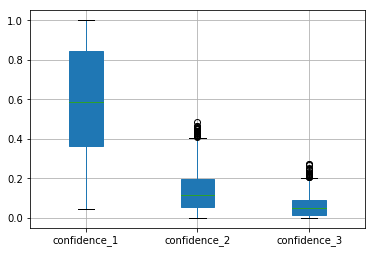

In [164]:
twitter_archive_master.boxplot(column=['confidence_1','confidence_2', 'confidence_3'], grid=True, patch_artist=True)

#### Insight 2

How do dogs without names compare to dogs with names across rating, retweet, favorite and confidence?

(For the output below, 'True' equates to dogs without names.)

In [165]:
print(twitter_archive_master.groupby(twitter_archive_master.name.isnull()).rating_numerator.mean())
print(twitter_archive_master.groupby(twitter_archive_master.name.isnull()).retweets.mean())
print(twitter_archive_master.groupby(twitter_archive_master.name.isnull()).favorites.mean())
print(twitter_archive_master.groupby(twitter_archive_master.name.isnull()).confidence_1.mean())
print(twitter_archive_master.groupby(twitter_archive_master.name.isnull()).confidence_2.mean())
print(twitter_archive_master.groupby(twitter_archive_master.name.isnull()).confidence_3.mean())


name
False    12.066409
True     12.708484
Name: rating_numerator, dtype: float64
name
False    2724.505185
True     2798.459627
Name: retweets, dtype: float64
name
False    9387.540000
True     7902.954969
Name: favorites, dtype: float64
name
False    0.600782
True     0.579600
Name: confidence_1, dtype: float64
name
False    0.133762
True     0.135797
Name: confidence_2, dtype: float64
name
False    0.060484
True     0.059754
Name: confidence_3, dtype: float64


#### Insight 3
What dog breed is predicted most often for each stage?

In [166]:
#Pupper stage

twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'pupper').prediction_1.value_counts().tail(120)

dog_stage  prediction_1      
False      tricycle               1
           trombone               1
           upright                1
           walking_stick          1
           washer                 1
           water_bottle           1
           water_buffalo          1
           wild_boar              1
           wool                   1
           zebra                  1
True       golden_retriever      20
           Pembroke              10
           Labrador_retriever     9
           pug                    8
           Chihuahua              6
           Pomeranian             6
           Lakeland_terrier       5
           toy_poodle             5
           Samoyed                4
           porcupine              4
           Border_collie          3
           French_bulldog         3
           German_shepherd        3
           Shetland_sheepdog      3
           Siamese_cat            3
           cocker_spaniel         3
           papillon               

In [167]:
twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'pupper').prediction_2.value_counts().tail(120)


dog_stage  prediction_2               
False      wallaby                         1
           wallet                          1
           warthog                         1
           water_bottle                    1
           water_buffalo                   1
           web_site                        1
           white_wolf                      1
           wombat                          1
           wood_rabbit                     1
True       Labrador_retriever             12
           Chihuahua                       8
           cocker_spaniel                  8
           Cardigan                        5
           Chesapeake_Bay_retriever        5
           French_bulldog                  5
           chow                            5
           collie                          5
           miniature_poodle                5
           toy_poodle                      5
           Norwegian_elkhound              4
           Shetland_sheepdog               4
           kelpi

In [168]:
twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'pupper').prediction_3.value_counts().tail(130)

dog_stage  prediction_3             
False      whiptail                     1
           wild_boar                    1
           window_screen                1
           wing                         1
           wok                          1
           wolf_spider                  1
           wombat                       1
           zebra                        1
True       Labrador_retriever           8
           kuvasz                       6
           chow                         5
           pug                          5
           Great_Pyrenees               4
           Pekinese                     4
           Siamese_cat                  4
           golden_retriever             4
           malamute                     4
           Boston_bull                  3
           Cardigan                     3
           Chihuahua                    3
           Eskimo_dog                   3
           French_bulldog               3
           German_shepherd             

In [169]:
#doggo stage

print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'doggo').prediction_1.value_counts().tail(67))
print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'doggo').prediction_2.value_counts().tail(67))
print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'doggo').prediction_3.value_counts().tail(67))




dog_stage  prediction_1             
False      tailed_frog                  1
           teapot                       1
           terrapin                     1
           three-toed_sloth             1
           tick                         1
           tiger_shark                  1
           timber_wolf                  1
           toilet_seat                  1
           toilet_tissue                1
           traffic_light                1
           tricycle                     1
           trombone                     1
           upright                      1
           walking_stick                1
           washer                       1
           water_bottle                 1
           water_buffalo                1
           wild_boar                    1
           wooden_spoon                 1
           zebra                        1
True       golden_retriever             9
           Labrador_retriever           5
           German_shepherd             

In [170]:
#puppo stage

print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'puppo').prediction_1.value_counts().tail(22))
print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'puppo').prediction_2.value_counts().tail(22))
print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'puppo').prediction_3.value_counts().tail(22))




dog_stage  prediction_1                  
False      water_buffalo                     1
           wild_boar                         1
           wooden_spoon                      1
           zebra                             1
True       Eskimo_dog                        3
           Labrador_retriever                2
           golden_retriever                  2
           Airedale                          1
           American_Staffordshire_terrier    1
           Cardigan                          1
           German_shepherd                   1
           Italian_greyhound                 1
           Lakeland_terrier                  1
           Old_English_sheepdog              1
           Pembroke                          1
           Rottweiler                        1
           chow                              1
           dishwasher                        1
           malamute                          1
           miniature_pinscher                1
           padlock

In [171]:
#floofer stage

print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'floofer').prediction_1.value_counts().tail(7))
print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'floofer').prediction_2.value_counts().tail(7))
print(twitter_archive_master.groupby(twitter_archive_master.dog_stage == 'floofer').prediction_3.value_counts().tail(7))





dog_stage  prediction_1           
False      zebra                      1
True       Samoyed                    2
           Lhasa                      1
           Pomeranian                 1
           chow                       1
           golden_retriever           1
           wire-haired_fox_terrier    1
Name: prediction_1, dtype: int64
dog_stage  prediction_2     
False      wood_rabbit          1
True       Pomeranian           2
           Lakeland_terrier     1
           Pembroke             1
           Shetland_sheepdog    1
           Shih-Tzu             1
           Tibetan_mastiff      1
Name: prediction_2, dtype: int64
dog_stage  prediction_3   
False      zebra              1
True       keeshond           2
           Maltese_dog        1
           Newfoundland       1
           Tibetan_terrier    1
           buckeye            1
           collie             1
Name: prediction_3, dtype: int64


In [172]:
twitter_archive_master.dog_stage.value_counts()

pupper     210
doggo       67
puppo       22
floofer      7
Name: dog_stage, dtype: int64

#### Visualization

Is there a linear relationship between retweets and favorites?

In [173]:
import seaborn as sns

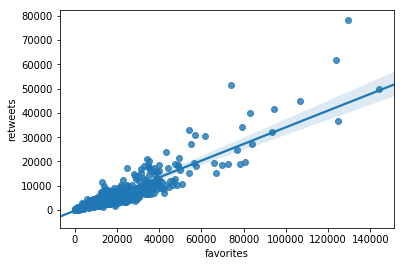

In [174]:
sns.regplot(x="favorites", y="retweets", data=twitter_archive_master);